# Assignment 10

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [32]:
print("2434219")

2434219


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" libraries.

In [33]:
# Write your answer here:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from datetime import date, time, datetime

<font size = "5">

In this assignment, we will work with a World Bank <br>
dataset on the proportion of urban population across <br>
countries, from 2016-2020.

- This is an example of a "panel"/"longitudinal" dataset <br>
 which contains information about the same unit (country) <br>
 over time.
 - This is in "long" format (see Lecture 21)

<font size = "5">

(a) Import data and parse dates 

<font size = "3">


- Import "data_raw/wdi_long.csv"
- Create a new column called "date" which uses ```pd.to_datetime(...,format = ...)``` <br>
to convert year to a date format
- To get full points use wild cards to establish the format.

Hint: See Lecture 20 for information about wild cards

In [34]:
# Write your own code

wdi_long = pd.read_csv("data_raw/wdi_long.csv")

wdi_long['date'] = pd.to_datetime(wdi_long['year'], format = "%Y")

In [35]:
wdi_long

,year,year_code,country_name,country_code,prop_urban,date
0,2016,YR2016,Afghanistan,AFG,25.020,2016-01-01
1,2016,YR2016,Albania,ALB,58.421,2016-01-01
2,2016,YR2016,Algeria,DZA,71.459,2016-01-01
3,2016,YR2016,American Samoa,ASM,87.198,2016-01-01
4,2016,YR2016,Andorra,AND,88.248,2016-01-01
...,...,...,...,...,...,...
1080,2020,YR2020,Virgin Islands (U.S.),VIR,95.939,2020-01-01
1081,2020,YR2020,West Bank and Gaza,PSE,76.719,2020-01-01
1082,2020,YR2020,"Yemen, Rep.",YEM,37.908,2020-01-01
1083,2020,YR2020,Zambia,ZMB,44.629,2020-01-01


<font size = "5">

(b)  Sort by two columns

<font size = "3">

- Create a new dataset "data_sorted" that sorts by "country_name" and "date"

HINT: Include a list of column names as the main sorting argument.

In [36]:
# Write your own code

list_sort = ['date','country_name']
data_sorted = wdi_long.sort_values(list_sort, ascending =True)

data_sorted 

,year,year_code,country_name,country_code,prop_urban,date
0,2016,YR2016,Afghanistan,AFG,25.020,2016-01-01
1,2016,YR2016,Albania,ALB,58.421,2016-01-01
2,2016,YR2016,Algeria,DZA,71.459,2016-01-01
3,2016,YR2016,American Samoa,ASM,87.198,2016-01-01
4,2016,YR2016,Andorra,AND,88.248,2016-01-01
...,...,...,...,...,...,...
1080,2020,YR2020,Virgin Islands (U.S.),VIR,95.939,2020-01-01
1081,2020,YR2020,West Bank and Gaza,PSE,76.719,2020-01-01
1082,2020,YR2020,"Yemen, Rep.",YEM,37.908,2020-01-01
1083,2020,YR2020,Zambia,ZMB,44.629,2020-01-01


<font size = "5">

(c) Compute within-unit time differences

<font size = "3">

**Example**
- Each country has data for multiple dates
- The following code calculates the time-difference between each date <br>
```
(data_sorted.groupby("country_name")["date"]
            .diff())
```

**Instructions**:
- Now, instead of ["date"] use ```["prop_urban"]```
- Store the result in a new column called "diff_prop_urban"
- This adds a new column with the country-level changes in <br>
the urban propulaton each year

HINT: Check Lecture 21 for using ```.diff()``` <br>
Note: Using ".groupby()" is important so that each country is analyzed <br>
separately.

In [37]:
# Write your own code

wdi_long['diff_prop_urban'] = (data_sorted.groupby('country_name')['prop_urban']
                               .diff())

wdi_long


,year,year_code,country_name,country_code,prop_urban,date,diff_prop_urban
0,2016,YR2016,Afghanistan,AFG,25.020,2016-01-01,NaN
1,2016,YR2016,Albania,ALB,58.421,2016-01-01,NaN
2,2016,YR2016,Algeria,DZA,71.459,2016-01-01,NaN
3,2016,YR2016,American Samoa,ASM,87.198,2016-01-01,NaN
4,2016,YR2016,Andorra,AND,88.248,2016-01-01,NaN
...,...,...,...,...,...,...,...
1080,2020,YR2020,Virgin Islands (U.S.),VIR,95.939,2020-01-01,0.107
1081,2020,YR2020,West Bank and Gaza,PSE,76.719,2020-01-01,0.279
1082,2020,YR2020,"Yemen, Rep.",YEM,37.908,2020-01-01,0.635
1083,2020,YR2020,Zambia,ZMB,44.629,2020-01-01,0.557


<font size = "5">

(d) Plot time series for single country

<font size = "3">

- Use ".query()" to subset "data_sorted" for rows that satisfy

$\quad$  ```  'country_name == "United States"' ```
 
- Produce a line plot with the evolution of "prop_urban" over time in the <br>
United States



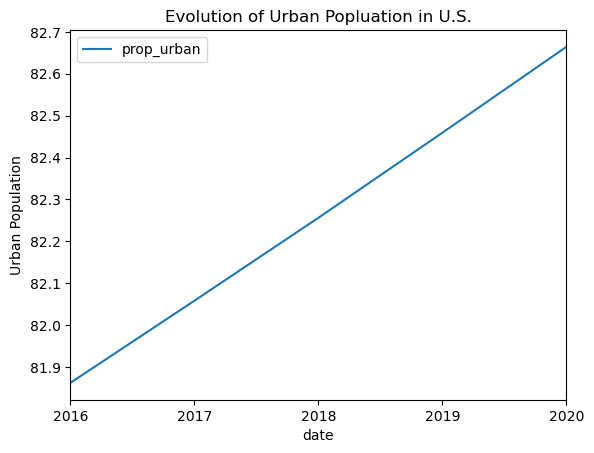

In [38]:
# Write your own code

subset = data_sorted.query('country_name == "United States"')

subset[['date','prop_urban']].set_index('date').plot()

plt.xlabel('date')
plt.ylabel('Urban Population')
plt.title("Evolution of Urban Popluation in U.S.")
plt.show()


<font size = "5">

(e) Convert to wide format

<font size = "3">

- Convert "data_sorted" from long to wide, using the following arguments: <br>
```
   index = 'country_name'
   columns = 'year'
   values =  'prop_urban'
```
- Display the dataset to check that it is in wide format

HINT: See Lecture 21 for details



In [39]:
# Write your own code

wdi_wide = (pd.pivot(data_sorted,
                     index = 'country_name',
                     columns = 'year',
                     values = 'prop_urban').reset_index())

wdi_wide

year,country_name,2016,2017,2018,2019,2020
0,Afghanistan,25.020,25.250,25.495,25.754,26.026
1,Albania,58.421,59.383,60.319,61.229,62.112
2,Algeria,71.459,72.052,72.629,73.189,73.733
3,American Samoa,87.198,87.170,87.153,87.147,87.153
4,Andorra,88.248,88.150,88.062,87.984,87.916
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),95.480,95.603,95.721,95.832,95.939
213,West Bank and Gaza,75.628,75.894,76.164,76.440,76.719
214,"Yemen, Rep.",35.394,36.016,36.642,37.273,37.908
215,Zambia,42.438,42.976,43.521,44.072,44.629
